# Pouya Khani(99210283) & Pedram Shateri(400211398)

* if you don't have SpaCy or any other package installed in your local machine, please run the codes below once.

* if you run this file on google colab u don't need these commands.

In [ ]:
pip install SpaCy

In [ ]:
pip install gensim

In [ ]:
pip install mlxtend

Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import spacy
import re
import gensim
import gensim.corpora as corpora
import nltk
import matplotlib.pyplot as plt
import string
import copy
import random
import logging
import warnings

from pprint import pprint
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from nltk.corpus import stopwords


%matplotlib inline
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
warnings.filterwarnings("ignore",category=DeprecationWarning)

**Question 1 -->**

Download and prepare essential corpuses (if you had any issues downloading, please use vpn)

In [2]:
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

**1.E** - Declare a function for calculating classification reports and confusion matrix

In [3]:
def analysis(labels,predictions):
  print("\nClassification Report: \n",classification_report(labels,predictions,target_names=['positive','negative']))
  print("\nAccuracy: \n",accuracy_score(labels,predictions))
  conf_mat = confusion_matrix(labels,predictions)
  print("\nConfusion Matrix: \n",plot_confusion_matrix(conf_mat,colorbar=True,show_absolute=True,show_normed=True))

* if you want to load the data from google drive and run the codes in google colab please run the cell below

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Prepare dataset(loading - drop NaN values - split text from target)

In [6]:
raw = pd.read_csv('./drive/MyDrive/news.csv')

raw.dropna(axis=0,inplace=True)
raw_text = raw[['text']].copy()
raw_target = raw[['label']].copy()
cm_advance_preproc = copy.deepcopy(raw_text)

**1.A** - Declare Preprocess function

In [7]:
def preproc(raw_commentt):
  cm_advance_preproc = copy.deepcopy(raw_commentt)
  #a
  cm_advance_preproc['text'] = cm_advance_preproc['text'].str.lower()
  #b
  cm_advance_preproc['text'] = cm_advance_preproc['text'].str.replace('\d+', '')
  #c
  cm_advance_preproc['text'] = cm_advance_preproc['text'].str.strip()
  cm_advance_preproc['text'] = cm_advance_preproc['text'].apply(lambda x: ' '.join([item for item in x.split() if len(item) != 1 ]))
  #d
  cm_advance_preproc['text'] = cm_advance_preproc['text'].str.replace('[^\w\s]','')

  cm_advance_preproc['tokenized'] = cm_advance_preproc.apply(lambda row: word_tokenize(row['text']), axis=1)

  #e
  stop = stopwords.words('english')
  cm_advance_preproc['tokenized'] = cm_advance_preproc['tokenized'].apply(lambda x: [item for item in x if item not in stop])
  #f
  stemmer = PorterStemmer()
  cm_advance_preproc['tokenized'] = cm_advance_preproc['tokenized'].apply(lambda x: [stemmer.stem(y) for y in x])
  #f
  lemmatizer = nltk.stem.WordNetLemmatizer()
  cm_advance_preproc['tokenized'] = cm_advance_preproc['tokenized'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
  #return result
  return cm_advance_preproc

preprocessing

In [8]:
text_preproc = preproc(raw_text)

**1.B** - CountVectorize declare and apply

In [9]:
vectorizer = CountVectorizer(
    lowercase=False,
    max_features = 1000,
)
X = vectorizer.fit_transform(text_preproc.text)
Y = np.ravel(raw_target)
X = X.todense()

**1.C** - Train Test split

In [10]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=1,shuffle=True)

**1.D** - define model and training phase and produce reports

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,



Classification Report: 
               precision    recall  f1-score   support

    positive       0.86      0.84      0.85      2076
    negative       0.80      0.82      0.81      1581

    accuracy                           0.83      3657
   macro avg       0.83      0.83      0.83      3657
weighted avg       0.83      0.83      0.83      3657


Accuracy: 
 0.832923161060979

Confusion Matrix: 
 (<Figure size 432x288 with 2 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7fd566deda10>)


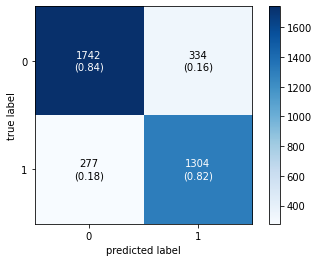

In [11]:
model = MultinomialNB().fit(X_train,Y_train)
predict_label = model.predict(X_val)
analysis(Y_val,predict_label)

**Question 2 -->**

**2.A**

In [12]:
df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')
df.head()

,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


**2.B**

In [13]:
# Convert to list
data = df.content.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]


# # Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# # Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

**2.C**

In [14]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

**2.D**

In [15]:
# Build the bigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases. 

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)

**2.E**

In [16]:
# Define functions for stopwords, bigrams, and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [17]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

**2.F**

In [18]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


**2.G**

In [19]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [20]:
# Print the Keyword in the 20 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.051*"report" + 0.027*"black" + 0.020*"fire" + 0.020*"white" + '
  '0.016*"trial" + 0.016*"cover" + 0.015*"medium" + 0.013*"vote" + '
  '0.012*"minor" + 0.012*"title"'),
 (1,
  '0.021*"god" + 0.020*"accept" + 0.016*"member" + 0.015*"man" + '
  '0.014*"israeli" + 0.014*"season" + 0.012*"publish" + 0.012*"lebanese" + '
  '0.012*"jewish" + 0.011*"brain"'),
 (2,
  '0.017*"package" + 0.016*"press" + 0.015*"item" + 0.015*"break" + '
  '0.011*"level" + 0.010*"edge" + 0.009*"hole" + 0.007*"eye" + '
  '0.007*"contribute" + 0.007*"equipment"'),
 (3,
  '0.025*"pc" + 0.022*"contain" + 0.020*"input" + 0.020*"reality" + '
  '0.017*"picture" + 0.016*"object" + 0.016*"level" + 0.015*"box" + '
  '0.015*"quality" + 0.013*"greek"'),
 (4,
  '0.089*"ax" + 0.076*"max" + 0.032*"space" + 0.021*"launch" + 0.018*"di_di" + '
  '0.017*"orbit" + 0.016*"sphere" + 0.015*"satellite" + 0.014*"plane" + '
  '0.014*"mission"'),
 (5,
  '0.019*"people" + 0.017*"kill" + 0.015*"child" + 0.015*"government" + '
  '0.0